### Text Analysis for content from teachers' group
    Find out the most frequently used words, bigramd , and trigrams 

In [4]:

import numpy as np
import pandas as pd
import re
import string
from textblob import TextBlob, Word
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [5]:
# from google.colab import files  # this code is for when using colab
# uploaded = files.upload()

In [6]:
# import io
# df = pd.read_csv(io.BytesIO(uploaded['combine_25.csv']))
df = pd.read_csv('../data/teacher_combine_50.csv')

In [7]:
df.shape

(9995, 11)

In [8]:
df.head()

,subreddit,id,selftext,title,num_comments,created_utc,parent_id,link_id,author,body,all_text
0,Teachers,u35imn,I teach 8th grade at a private school in Ontar...,LGBT teacher with no admin support in traditio...,0.0,1649898781,fromsubmission,fromsubmission,fromsubmission,fromsubmission,I teach 8th grade at a private school in Ontar...
1,Teachers,u35g5w,[removed],Please Help,0.0,1649898562,fromsubmission,fromsubmission,fromsubmission,fromsubmission,"[removed], fromsubmission, Please Help"
2,Teachers,u35fe3,For some context I'm teaching US history. \n\n...,"I got that kid that won't stop being ""that kid"".",0.0,1649898496,fromsubmission,fromsubmission,fromsubmission,fromsubmission,For some context I'm teaching US history. \n\n...
3,Teachers,u35668,I am a middle school coding teacher. I’m wonde...,Can I use class wallet to buy an oculus?,0.0,1649897706,fromsubmission,fromsubmission,fromsubmission,fromsubmission,I am a middle school coding teacher. I’m wonde...
4,Teachers,u353wr,A student turned in their essay (which we work...,Plagiarism &amp; Parents,0.0,1649897510,fromsubmission,fromsubmission,fromsubmission,fromsubmission,A student turned in their essay (which we work...


In [9]:
df.isnull().sum()

subreddit        0
id               0
selftext        35
title            0
num_comments     0
created_utc      0
parent_id        0
link_id          0
author           0
body             0
all_text         0
dtype: int64

In [10]:
df.fillna('a', inplace=True)

In [11]:
df.isnull().sum()

subreddit       0
id              0
selftext        0
title           0
num_comments    0
created_utc     0
parent_id       0
link_id         0
author          0
body            0
all_text        0
dtype: int64

In [12]:
from sklearn.feature_extraction import text

text.ENGLISH_STOP_WORDS
,
add_stop_words = ['fromcomments','posts','org','human','compose','10','webp','ncsu','crap','pray', 'survey', 'png','www','x200b', 'reddit', 'nih', 'gov','qualtrics', 'sure','new', 'redd', 'fromsubmission','amp','https', 'removed','having','really','said','does', 'https','com','things','went','did', 'didn','just' ,'like','doe','ll', 'way','good','don','know','time', 'doesn','think','told', 'thanks','getting','ve' ,'going', 'got', 'ha', 'isn', 'wa']

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# stop_words

In [38]:
count_vector = CountVectorizer(analyzer = "word", 
                               tokenizer = None, 
                               preprocessor = None,
                               stop_words = stop_words, 
                               max_features = 100, 
                               ngram_range=(1, 3)) 

vector_input_combine = df['all_text']

# fit_transform the vectorizer
all_words = count_vector.fit_transform(vector_input_combine)

# convert output to a Numpy array
all_words = all_words.toarray()

In [39]:
all_word_list = count_vector.get_feature_names()
print(all_word_list)

['able', 'actually', 'admin', 'advice', 'ask', 'asked', 'bad', 'behavior', 'best', 'better', 'break', 'care', 'child', 'class', 'classes', 'classroom', 'college', 'come', 'day', 'days', 'different', 'district', 'doing', 'education', 'email', 'end', 'experience', 'feel', 'grade', 'great', 'hard', 'help', 'high', 'high school', 'home', 'hours', 'job', 'kid', 'kids', 'learning', 'leave', 'left', 'lesson', 'let', 'life', 'little', 'long', 'look', 'looking', 'lot', 'love', 'make', 'math', 'maybe', 'middle', 'minutes', 'need', 'parent', 'parents', 'pay', 'people', 'point', 'position', 'principal', 'question', 'questions', 'read', 'right', 'room', 'say', 'school', 'schools', 'start', 'started', 'state', 'student', 'students', 'sub', 'talk', 'teach', 'teacher', 'teachers', 'teaching', 'tell', 'test', 'thing', 'thought', 'times', 'today', 'try', 'trying', 'use', 'want', 'wanted', 'week', 'weeks', 'work', 'working', 'year', 'years']


In [40]:
word_matrix = pd.DataFrame(all_words, columns=count_vector.get_feature_names())

word_matrix.sum().sort_values(ascending=False).head(50)

school         6029
teacher        4418
students       4009
year           3610
teachers       3056
kids           2940
teaching       2833
class          2633
student        2613
work           2527
want           2060
day            1949
job            1838
feel           1724
need           1545
teach          1518
make           1485
grade          1410
admin          1358
years          1328
help           1246
classroom      1178
people         1172
parents        1145
say            1138
high           1090
doing          1061
district       1027
love           1015
education      1005
week            973
kid             886
right           865
lot             847
advice          843
today           842
schools         828
principal       812
tell            809
high school     797
working         774
math            768
end             763
days            762
classes         758
home            725
use             714
let             705
ask             686
different       666


In [41]:
word_freq = pd.DataFrame(word_matrix.sum().sort_values(ascending=False).head(25),columns = ['Count'])
word_freq.T

,school,teacher,students,year,teachers,kids,teaching,class,student,work,...,teach,make,grade,admin,years,help,classroom,people,parents,say
Count,6029,4418,4009,3610,3056,2940,2833,2633,2613,2527,...,1518,1485,1410,1358,1328,1246,1178,1172,1145,1138


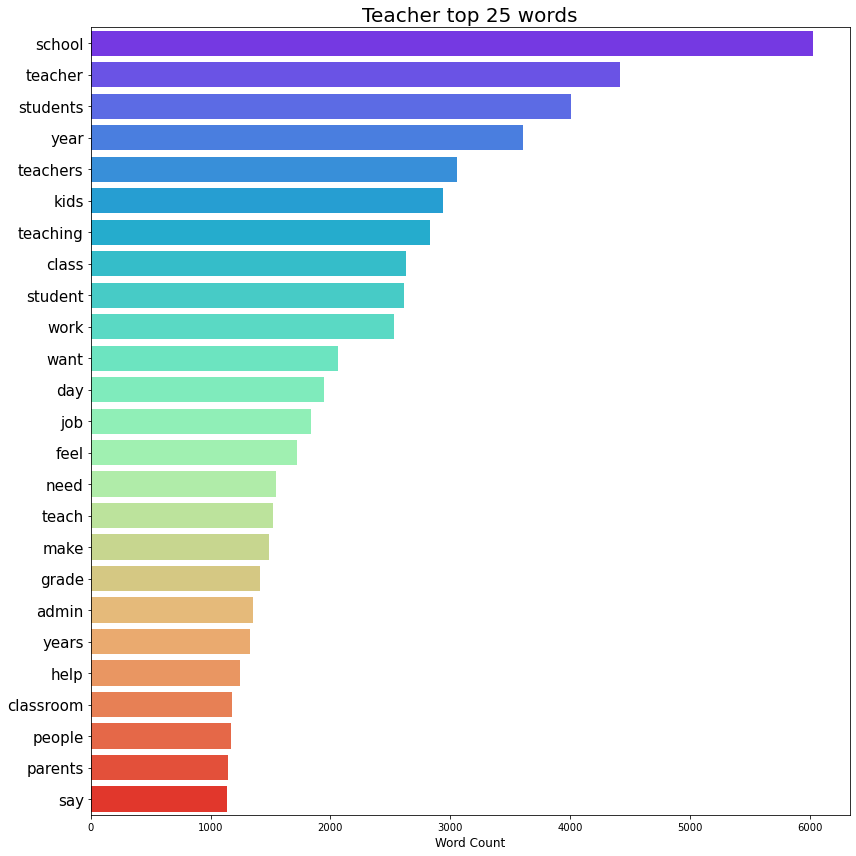

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,12))

sns.barplot(x='Count', y=word_freq.index , data=word_freq, palette = "rainbow")
plt.title('Teacher top 25 words',fontsize=20)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(fontsize=15)
plt.tight_layout()

In [20]:
count_vector = CountVectorizer(analyzer = "word", 
                               tokenizer = None, 
                               preprocessor = None,
                               stop_words = stop_words, 
                               max_features = 100, 
                               ngram_range=(2, 2)) 

vector_input_combine = df['all_text']

# fit_transform the vectorizer
all_words = count_vector.fit_transform(vector_input_combine)

# convert output to a Numpy array
all_words = all_words.toarray()

In [21]:
all_word_list = count_vector.get_feature_names()
print(all_word_list)

['1st grade', '20 minutes', '20 years', '30 minutes', '3rd grade', '4th grade', '5th grade', '6th grade', '7th grade', '8th grade', 'beginning year', 'big deal', 'charter school', 'classroom management', 'common core', 'contract hours', 'current school', 'day day', 'doing work', 'elementary school', 'end day', 'end school', 'end year', 'english teacher', 'feel bad', 'grade class', 'grade level', 'grade teacher', 'greatly appreciated', 'high school', 'kids school', 'lesson plan', 'lesson plans', 'little bit', 'long term', 'looking advice', 'love job', 'love kids', 'love students', 'love teaching', 'makes feel', 'math teacher', 'mental health', 'middle school', 'months ago', 'multiple times', 'need advice', 'need help', 'past years', 'pay attention', 'private school', 'public education', 'public school', 'public schools', 'school board', 'school day', 'school district', 'school math', 'school school', 'school students', 'school teacher', 'school teachers', 'school year', 'school years', 

In [22]:
word_matrix = pd.DataFrame(all_words, columns=count_vector.get_feature_names())

word_matrix.sum().sort_values(ascending=False).head(50)

high school             797
middle school           378
school year             374
year teacher            288
student teaching        260
spring break            201
mental health           192
classroom management    167
year teaching           164
school district         159
social studies          158
long term               141
end year                138
years ago               138
student teacher         125
grade level             124
elementary school       119
special education       112
5th grade               110
school teacher          109
public school           102
lesson plans            100
social media             95
year old                 94
second year              90
teaching job             82
private school           82
current school           81
school day               79
end day                  79
school students          75
want teach               74
lesson plan              73
need advice              72
8th grade                72
need help           

In [23]:
word_freq = pd.DataFrame(word_matrix.sum().sort_values(ascending=False).head(25),columns = ['Count'])
word_freq.T

,high school,middle school,school year,year teacher,student teaching,spring break,mental health,classroom management,year teaching,school district,...,grade level,elementary school,special education,5th grade,school teacher,public school,lesson plans,social media,year old,second year
Count,797,378,374,288,260,201,192,167,164,159,...,124,119,112,110,109,102,100,95,94,90


In [24]:
print(word_freq.index)

Index(['high school', 'middle school', 'school year', 'year teacher',
       'student teaching', 'spring break', 'mental health',
       'classroom management', 'year teaching', 'school district',
       'social studies', 'long term', 'end year', 'years ago',
       'student teacher', 'grade level', 'elementary school',
       'special education', '5th grade', 'school teacher', 'public school',
       'lesson plans', 'social media', 'year old', 'second year'],
      dtype='object')


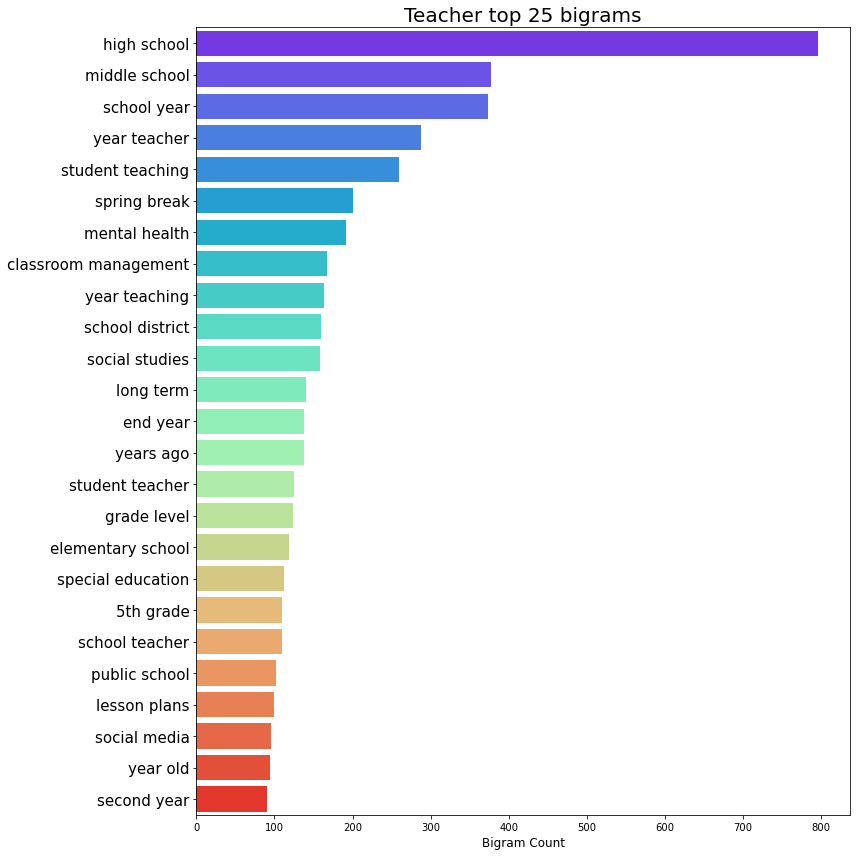

In [25]:
fig, ax = plt.subplots(figsize=(12,12))

sns.barplot(x='Count', y=word_freq.index , data=word_freq, palette = "rainbow")
plt.title('Teacher top 25 bigrams',fontsize=20)
plt.xlabel('Bigram Count', fontsize=12)
plt.yticks(fontsize=15)
plt.tight_layout()

25 top trigrams

In [43]:
count_vector = CountVectorizer(analyzer = "word", 
                               tokenizer = None, 
                               preprocessor = None,
                               stop_words = stop_words, 
                               max_features = 100, 
                               ngram_range=(3, 3)) 

vector_input_combine = df['all_text']

# fit_transform the vectorizer
all_words = count_vector.fit_transform(vector_input_combine)

# convert output to a Numpy array
all_words = all_words.toarray()

In [44]:
all_word_list = count_vector.get_feature_names()
print(all_word_list)

['15 20 minutes', '20 years ago', '2nd grade teacher', '2nd year teacher', '450 000 annually', '4th 5th grade', '4th grade teacher', '5th grade math', '5th grade teacher', 'advice greatly appreciated', 'beginning school year', 'cell phone policy', 'classroom management skills', 'common core math', 'couple weeks ago', 'critical race theory', 'currently student teaching', 'day spring break', 'days school year', 'docs google forms', 'doing right thing', 'early childhood education', 'elementary middle school', 'elementary school teacher', 'en wikipedia wiki', 'end school day', 'end school year', 'finishing student teaching', 'gamahucherpress yellowgum wp', 'grade social studies', 'graduated high school', 'high school art', 'high school class', 'high school college', 'high school english', 'high school kids', 'high school level', 'high school math', 'high school middle', 'high school science', 'high school social', 'high school student', 'high school students', 'high school teacher', 'high 

In [45]:
word_matrix = pd.DataFrame(all_words, columns=count_vector.get_feature_names())

word_matrix.sum().sort_values(ascending=False).head(50)

teach high school              67
long term sub                  63
end school year                47
teach middle school            46
high school teacher            37
middle high school             31
teaching high school           30
long story short               29
high school math               28
social studies teacher         28
second year teacher            28
high school students           26
year high school               26
week spring break              24
high school level              24
school high school             23
high school english            22
day spring break               21
common core math               19
second year teaching           19
special education teacher      19
mental health issues           19
middle school teacher          18
high school teachers           18
teaching middle school         18
middle school high             18
en wikipedia wiki              17
science social studies         17
advice greatly appreciated     17
student teachi

In [46]:
word_freq = pd.DataFrame(word_matrix.sum().sort_values(ascending=False).head(25),columns = ['Count'])
word_freq.T

,teach high school,long term sub,end school year,teach middle school,high school teacher,middle high school,teaching high school,long story short,high school math,social studies teacher,...,school high school,high school english,day spring break,common core math,second year teaching,special education teacher,mental health issues,middle school teacher,high school teachers,teaching middle school
Count,67,63,47,46,37,31,30,29,28,28,...,23,22,21,19,19,19,19,18,18,18


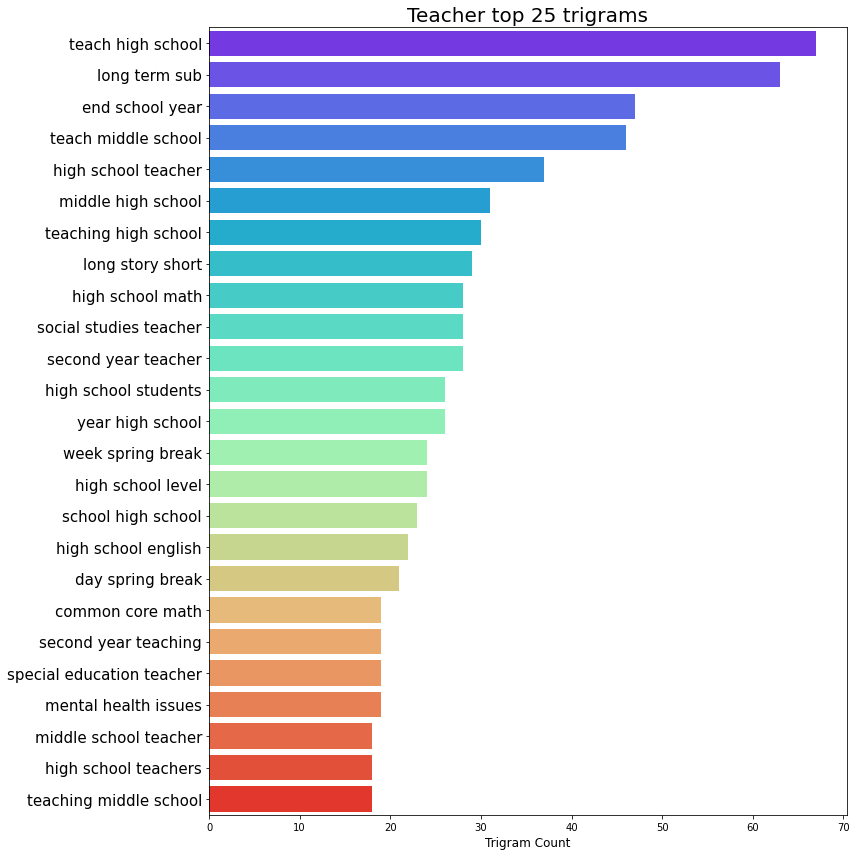

In [47]:
fig, ax = plt.subplots(figsize=(12,12))

sns.barplot(x='Count', y=word_freq.index , data=word_freq, palette = "rainbow")
plt.title('Teacher top 25 trigrams',fontsize=20)
plt.xlabel('Trigram Count', fontsize=12)
plt.yticks(fontsize=15)
plt.tight_layout()

Sentimenment analysis

In [31]:
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [32]:
df['sentiment'] = df['all_text'].apply(detect_sentiment)

(array([  21.,   64.,  142.,  415., 1726., 5569., 1421.,  461.,   91.,
          85.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

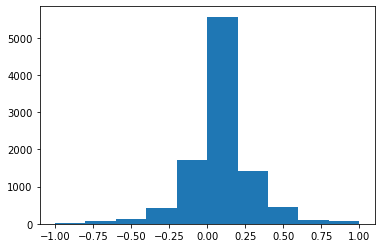

In [33]:
plt.hist(df['sentiment'])

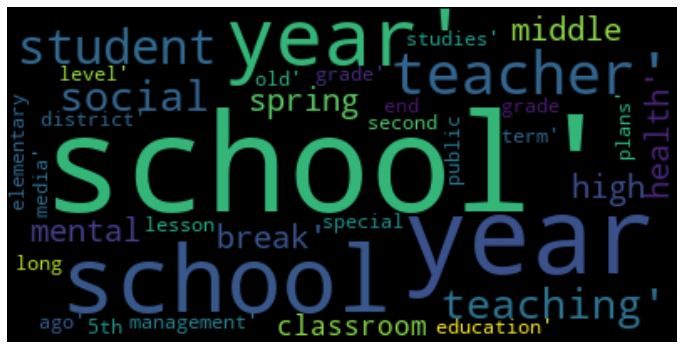

In [36]:
# Start with one review:
from wordcloud import WordCloud

text = "'high school', 'middle school', 'school year', 'year teacher','student teaching', 'spring break', 'mental health','classroom management', 'year teaching', 'school district','social studies', 'long term', 'end year', 'years ago','student teacher', 'grade level', 'elementary school','special education', '5th grade', 'school teacher', 'public school','lesson plans', 'social media', 'year old', 'second year'"
#print(text)
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()